# MLP - Multilayer Perceptron 
* Visualização: https://playground.tensorflow.org/ 

## Problema de Classificação
* **Identificar se um determinado asteroide é perigoso ou não**  
* **SUV - Checar essa informação.** 


Fonte: [MLP](https://www.kaggle.com/shrutimehta/nasa-asteroids-classification)

## Carregando os Dados

In [1]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/albathalita/MLP_Keras/main/nasa.csv")

# Transformar uma coluna de str em int
dataset['Hazardous'] = dataset['Hazardous'].astype(int)

dataset.head() 

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1


In [2]:
dataset.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


## Escolhendo atributos 
* Magnitude Absluta e Velociade Relativa Km/h

In [3]:
X = dataset.loc[:,['Absolute Magnitude','Relative Velocity km per hr']].values
# ou 
# X = dataset.iloc[:,2:14].values

y = dataset['Hazardous'].values
# ou 
# y = dataset.iloc[:,39].values

print(X[0:6,:])

[[2.16000000e+01 2.20170038e+04]
 [2.13000000e+01 6.52103461e+04]
 [2.03000000e+01 2.73265602e+04]
 [2.74000000e+01 4.02259482e+04]
 [2.16000000e+01 3.54269918e+04]
 [1.96000000e+01 3.89118383e+04]]


In [4]:
y[0:10]

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

## Separando entre conjuntos de treinamento e teste

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Normalização 
* A amplitude de variação dos dados são bem diferentes
* Permite que a faixa de variação seja equilibrada entre os diferentes atributos 
* Muitos algoritmos de aprendizado de máquinas são sensíveis a atribuitos com aplitude de valores muito distintos 
* Vídeo com explicações: https://youtu.be/kIeXOC-Rnb4 

In [6]:
# Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train) 
# Fit é quando precisa fazer ajuste (Só usa uma vez)

X_test = sc.transform(X_test)

## Treinamento

In [7]:
import tensorflow as tf

### Construíndo a estrutra da rede 
* Arquitetura 

In [8]:
# Inicialização 
classifier = tf.keras.models.Sequential()

# Adicionando a camada de entrada e a primeira camada escondida  
classifier.add( tf.keras.layers.Dense( activation = 'relu', input_dim = 2, units = 4, kernel_initializer = 'uniform'))
# (função de ativação, quantidade de entrada, quantidade de neurônios, pesos)

# Adicionando a camada de saída 
classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))
# (sigmoi - suavizar a resposta porque ajuda no treinamento, neurônio de saída, pesos)

In [9]:
# Montando a Rede 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Executando o treinamento 

In [10]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 81)
# batch_size - apresenta a amostra, recebe uma resposta e compara com a desejada
#       calcula o erro e disso ajusta o modelo.

# Quanto menor o valor do batch_size, mais tempo irá demorar

Epoch 1/81
3515/3515 [==============================] - 4s 968us/step - loss: 0.5060 - accuracy: 0.8458
Epoch 2/81
3515/3515 [==============================] - 3s 951us/step - loss: 0.4232 - accuracy: 0.8408
Epoch 3/81
3515/3515 [==============================] - 3s 932us/step - loss: 0.4132 - accuracy: 0.8409
Epoch 4/81
3515/3515 [==============================] - 3s 940us/step - loss: 0.4067 - accuracy: 0.8401
Epoch 5/81
3515/3515 [==============================] - 3s 951us/step - loss: 0.3976 - accuracy: 0.8429
Epoch 6/81
3515/3515 [==============================] - 3s 941us/step - loss: 0.4103 - accuracy: 0.8302
Epoch 7/81
3515/3515 [==============================] - 3s 945us/step - loss: 0.3801 - accuracy: 0.8432
Epoch 8/81
3515/3515 [==============================] - 3s 941us/step - loss: 0.3996 - accuracy: 0.8321
Epoch 9/81
3515/3515 [==============================] - 3s 948us/step - loss: 0.3792 - accuracy: 0.8355
Epoch 10/81
3515/3515 [==============================] - 3s 940u

## Avaliando do Modelo

In [11]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

[0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[[9.7519340e-08]
 [3.2394990e-01]
 [1.7681718e-03]
 [3.1826693e-01]
 [3.2579577e-01]
 [2.4129450e-03]
 [5.0509664e-07]
 [3.2656586e-01]
 [3.1534627e-01]
 [3.0363226e-01]
 [3.1694838e-01]
 [6.5425986e-05]
 [3.2294685e-01]
 [3.1250679e-01]
 [3.5915560e-01]
 [3.1504971e-01]
 [5.7902270e-09]
 [3.1305423e-01]
 [4.2991104e-08]
 [5.4101974e-08]
 [7.2312057e-03]
 [4.8232847e-05]
 [3.1854320e-01]
 [3.0850276e-01]
 [3.0490073e-05]
 [8.1816211e-08]
 [2.5865018e-05]
 [3.2400447e-01]
 [3.6880695e-06]
 [2.8401611e-05]
 [1.2834549e-02]
 [4.2316765e-02]
 [2.1174428e-07]
 [1.4405876e-02]
 [3.2839668e-01]]


In [12]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ] 

In [13]:
import numpy as np

y_pred_bin =  np.array(y_pred_bin)

In [14]:
print(y_test[0:35])
print(y_pred_bin[0:35])

[0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

Acurácia:  83.95904436860067 %


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bin)
print("Matrix de confusão: ")
print(cm)


Matrix de confusão: 
[[984   0]
 [188   0]]


## Visualizando os resultados



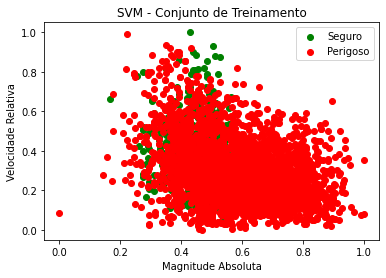

In [17]:
import matplotlib.pyplot as plt

# Seleção dos elementos classificados como negativos (perigoso)
mag_neg = X_train[y_train == 0, 0]
vel_neg = X_train[y_train == 0, 1]
mag_pos = X_train[y_train == 1, 0]
vel_pos = X_train[y_train == 1, 1]

plt.scatter(mag_pos,vel_pos, color='green', label = 'Seguro')
plt.scatter(mag_neg,vel_neg, color='red', label = 'Perigoso')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Magnitude Absoluta')
plt.ylabel('Velocidade Relativa')
plt.legend()
plt.show()

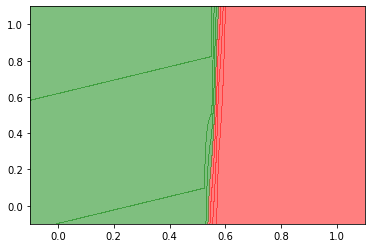

In [18]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx,vy) 

y_pred_mesh =  classifier.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('red','green')))

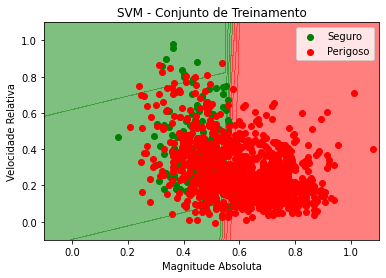

In [19]:
mag_neg = X_test[y_test == 0, 0]
vel_neg = X_test[y_test == 0, 1]
mag_pos = X_test[y_test == 1, 0]
vel_pos = X_test[y_test == 1, 1]

plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('red','green')))

plt.scatter(mag_pos,vel_pos, color='green', label = 'Seguro')
plt.scatter(mag_neg,vel_neg, color='red', label = 'Perigoso')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Magnitude Absoluta')
plt.ylabel('Velocidade Relativa')
plt.legend()
plt.show()

In [20]:
y_pred_mesh[30:35,40:45]

array([[7.9153503e-11, 1.5646059e-11, 3.0927079e-12, 6.1132718e-13,
        1.2083939e-13],
       [8.3192689e-11, 1.6444473e-11, 3.2505279e-12, 6.4252428e-13,
        1.2700579e-13],
       [8.7438154e-11, 1.7283629e-11, 3.4164015e-12, 6.7531213e-13,
        1.3348685e-13],
       [9.1900092e-11, 1.8165608e-11, 3.5907395e-12, 7.0977306e-13,
        1.4029865e-13],
       [9.6590277e-11, 1.9092703e-11, 3.7740028e-12, 7.4599685e-13,
        1.4745890e-13]], dtype=float32)